<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">=========================================================================================================</h5>
                <h2 style = "color:green">Assignment Part 1</h2>
                <h3 style = "color:orange">( Task - 3 )</h3>
                <h5 style = "color:blue">=========================================================================================================</h5>
            <br>
        <br>
    <br>
</center>

**Task-3** Clustering on Power Consumption Data (2.5 marks).

Notes:

1). This task requires to perform clustering on the Power Consumption data used in Task-1. But you need to have a different feature extraction manner. Specifically, the clustering is daily based, i.e., you need to extract features for each day, and perform clustering on these features. There are many possible options. A simple one could be the concatenation of the samples belonging to the same day. But you could use other options.

2). Note that clustering is unsupervised learning and the no label information is specified or used in the training stage. So, all the attributes including Temperature, Humidity, Wind Speed, and Power Consumption could be used as the feature of a day.

3). You need to tune the hyperparameter K for KMeans clustering. Or, you could run the hierarchical agglomerative clustering on a small sample set to select the value for K with the help of dendrogram visualization.

4). Try to interpretate the clusters. For example, different clusters might correspond to different months or seasons.

# Import Libraries

In [7]:
# Import Libraries

import math
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

# Load Dataset

In [4]:
# Load Dataset

dataset = pd.read_csv('Dataset/power-consumption/power-consumption.csv')
dataset

DateTime  Temperature  Humidity  Wind Speed  Power Consumption
0           1/1/17 0:00        6.559      73.8       0.083        34055.69620
1           1/1/17 0:10        6.414      74.5       0.083        29814.68354
2           1/1/17 0:20        6.313      74.5       0.080        29128.10127
3           1/1/17 0:30        6.121      75.0       0.083        28228.86076
4           1/1/17 0:40        5.921      75.7       0.081        27335.69620
...                 ...          ...       ...         ...                ...
52411  12/30/2017 23:10        7.010      72.4       0.080        31160.45627
52412  12/30/2017 23:20        6.947      72.6       0.082        30430.41825
52413  12/30/2017 23:30        6.900      72.8       0.086        29590.87452
52414  12/30/2017 23:40        6.758      73.0       0.080        28958.17490
52415  12/30/2017 23:50        6.580      74.1       0.081        28349.80989

[52416 rows x 5 columns]

# Pre-Processing

In [5]:
X = dataset.drop(['DateTime'], axis=1)
X

Temperature  Humidity  Wind Speed  Power Consumption
0            6.559      73.8       0.083        34055.69620
1            6.414      74.5       0.083        29814.68354
2            6.313      74.5       0.080        29128.10127
3            6.121      75.0       0.083        28228.86076
4            5.921      75.7       0.081        27335.69620
...            ...       ...         ...                ...
52411        7.010      72.4       0.080        31160.45627
52412        6.947      72.6       0.082        30430.41825
52413        6.900      72.8       0.086        29590.87452
52414        6.758      73.0       0.080        28958.17490
52415        6.580      74.1       0.081        28349.80989

[52416 rows x 4 columns]

# Find Clusters

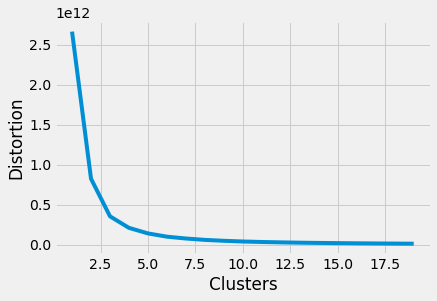

In [9]:
my_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100)
    kmeans.fit(X)
    my_list.append(kmeans.inertia_)
    
plt.plot(range(1,20), my_list)
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.show()

In [10]:
scores = []
scores2 = []
inertia = []
inertia2 = []
y_pred = kmeans.predict(X)

In [12]:
for i in range(2, 20):
    scores3 = []
    inertias3 = []
    n_iteration=5
    for j in range(0, n_iteration):
        kmeans = KMeans(n_clusters=i, init='random', max_iter=100)
        kmeans.fit(X)
        labels = kmeans.labels_
        scores3.append(davies_bouldin_score(X, labels))
        inertias3.append(math.sqrt(kmeans.inertia_/X.shape[0]))
    
    scores.append(np.mean(scores3))
    scores2.append(np.std(scores3))
    inertia.append(np.mean(inertias3))
    inertia2.append(np.std(inertias3))

# Plot

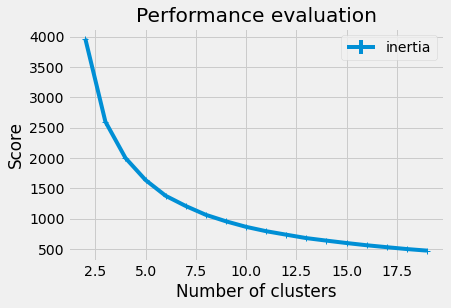

In [15]:
plt.errorbar(range(2, 20), inertia, yerr=inertia2, marker='+', label='inertia')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Tune the Hyperparameter K for the K Means Clustring

In [16]:
from sklearn.model_selection import GridSearchCV

In [18]:
random_grid = {'n_clusters': [1,2,3,4,5,6,7,8,9,10]}

rf = KMeans()

clf = GridSearchCV(estimator=rf, param_grid=random_grid, cv=10, n_jobs=-1, verbose=2)
clf.fit(X)
clfa = clf.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
clfa

KMeans(n_clusters=10)

In [21]:
# Fit Classifier
clfa.fit(X)

pred = clfa.predict(X)

In [22]:
pred

array([5, 6, 6, ..., 6, 6, 6])

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">=========================================================================================================</h5>
                <h2 style = "color:green">Thank you so much</h2>
                <h5 style = "color:blue">=========================================================================================================</h5>
            <br>
        <br>
    <br>
</center>